### Qualitative

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd

%matplotlib inline

In [2]:
counties = gpd.read_file(r'C:\Users\user\workspace\c11\python\projects\geospatial-Chris-Swann\data\county\tncounty.shp')

In [12]:
counties.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.07 3..."
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ..."
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.33 400456.525, 886774.3..."
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.61 2..."
4,80,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ..."


In [13]:
counties.columns

Index(['OBJECTID', 'NAME', 'KEY', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry'], dtype='object')

C:\Users\user\AppData\Local\Temp\ipykernel_34416\1144864795.py:2: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  counties.plot(ax = ax, column = 'NAME', color='#AADAFF', edgecolor='black')


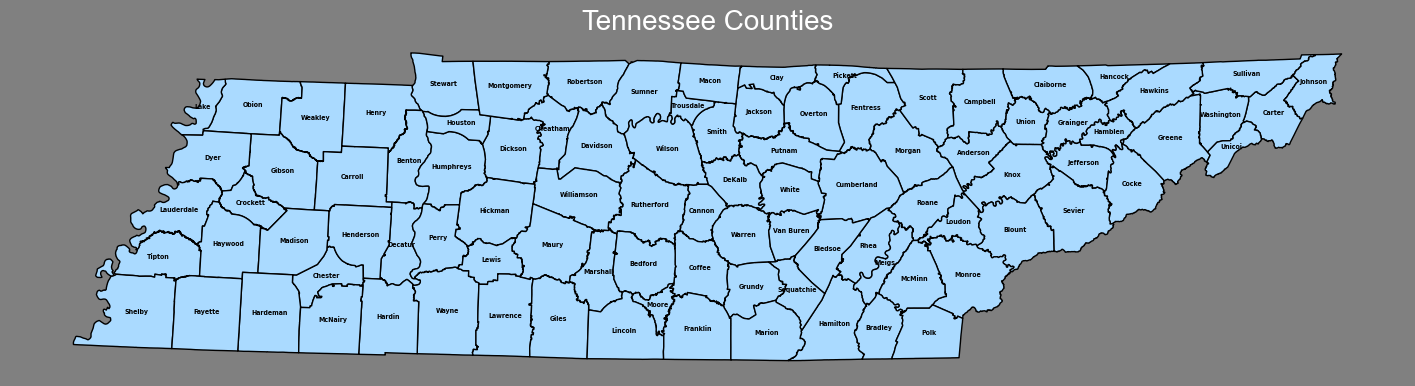

In [34]:
fig, ax = plt.subplots(figsize = (18,6), facecolor='grey')
counties.plot(ax = ax, column = 'NAME', color='#AADAFF', edgecolor='black')

for index, row in counties.iterrows():
    plt.annotate(text=row['NAME'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontweight = 'bold', fontsize=4.5, color='black')

plt.title('Tennessee Counties', font="Arial", fontsize=20, color='white')
plt.axis('off')

plt.savefig("../maps/tn_counties.png", dpi=300, bbox_inches='tight')

plt.show();

In [16]:
east_tn = [
    "Anderson","Bledsoe","Blount","Bradley","Campbell","Carter","Claiborne","Cocke",
    "Cumberland","Grainger","Greene","Hamblen","Hamilton","Hancock","Hawkins","Jefferson",
    "Johnson","Knox","Loudon","Marion","McMinn","Meigs","Monroe","Morgan","Polk","Rhea",
    "Roane","Scott","Sevier","Sullivan","Unicoi","Union","Washington"
]

middle_tn = [
    "Bedford","Cannon","Cheatham","Clay","Coffee","Davidson","DeKalb","Dickson","Fentress",
    "Franklin","Giles","Grundy","Hickman","Houston","Humphreys","Jackson","Lawrence","Lewis",
    "Lincoln","Macon","Marshall","Maury","Montgomery","Moore","Overton","Perry","Pickett",
    "Putnam","Robertson","Rutherford","Sequatchie","Smith","Stewart","Sumner","Trousdale",
    "Van Buren","Warren","Wayne","White","Williamson","Wilson"
]

west_tn = [
    "Lake","Obion","Weakley","Henry","Dyer","Gibson","Carroll","Lauderdale","Crockett",
    "Tipton","Haywood","Madison","Chester","Henderson","Benton","Decatur","Shelby",
    "Fayette","Hardeman","McNairy","Hardin"
]

In [39]:
def assign_division(name):
    if name in east_tn:
        return "East Tennessee"
    if name in middle_tn:
        return "Middle Tennessee"
    if name in west_tn:
        return "West Tennessee"
    return "Unknown"

counties["Region"] = counties["NAME"].apply(assign_division)    

counties.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,Region
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.07 3...",West Tennessee
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",Middle Tennessee
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.33 400456.525, 886774.3...",West Tennessee
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.61 2...",East Tennessee
4,80,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ...",Middle Tennessee


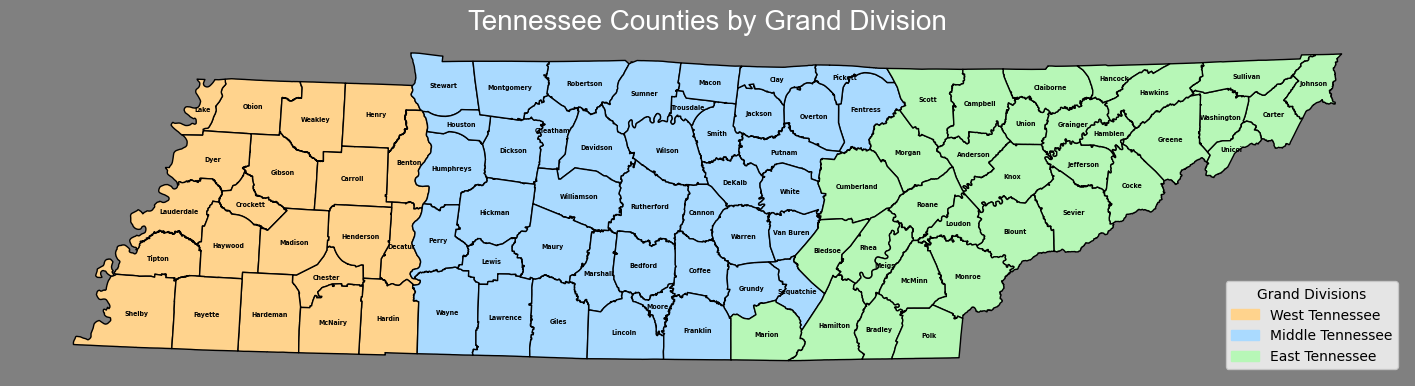

In [40]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(18,6), facecolor="grey")

palette = {
    "West Tennessee":  "#ffd38d",
    "Middle Tennessee":"#aadaff",
    "East Tennessee":  "#b7f7b7",   
}

for div, color in palette.items():
    counties[counties["Region"] == div].plot(ax=ax, color=color, edgecolor="black", label=div)

# labels
for _, row in counties.iterrows():
    plt.annotate(
        text=row["NAME"],
        xy=(row["geometry"].centroid.x, row["geometry"].centroid.y),
        ha="center", va="center", fontsize=4.5, fontweight="bold", color="black"
    )

patches = [mpatches.Patch(color=color, label=div) for div, color in palette.items()]
plt.legend(handles=patches, title="Grand Divisions", loc="lower right")

plt.title("Tennessee Counties by Grand Division", font="Arial", fontsize=20, color="white")
plt.axis("off")

plt.savefig("../maps/tn_grand_division.png", dpi=300, bbox_inches='tight')

plt.show();